# <span style = "color:black">**개요**
선형회귀는 변수사이의 관계가 선형이라고 가정했을 때, 독립변수로 연속형 변수인 종속변수의 값을 예측하기 위한 문제에서 사용합니다.

# <span style="color:black">**Problem Setting**</span>


데이터셋이 m개의 독립변수를 가지며 1개의 연속적인 종속변수를 가진다고 가정합시다. 우리의 목적은 x를 입력으로 하고 y값을 예측하는 모형을 만드는 것이 목적입니다. 

\begin{aligned}
&\text{Given, }D = \{(x_{i,1},x_{2,i},\dots,x_{M,i},y_i)\}_{i=1}^{i=N} \\
&\text{Goal : unseendata에 대해서 x를 입력으로 연속형변수 y값을 예측하는 선형모형만들기}
\end{aligned}

# <span style="color:black">**Linear Regression**</span>


선형회귀는 독립변수와 종속변수사이의 관계를 선형(일차식,직선,평면)으로 모델링하여 독립변수$x$를 입력으로 연속형변수인 종속변수 $y$값을 예측하는 문제에 활용됩니다. 선형회귀는 가장 간단한 예측모형으로 선형회귀의 핵심아이디어를 모방하여 다른 모형에서도 활용합니다.

## <span style = "color:black"> <span style = "color : black">**Assumption & modeling**


Text(0.5, 1.0, 'n=200')

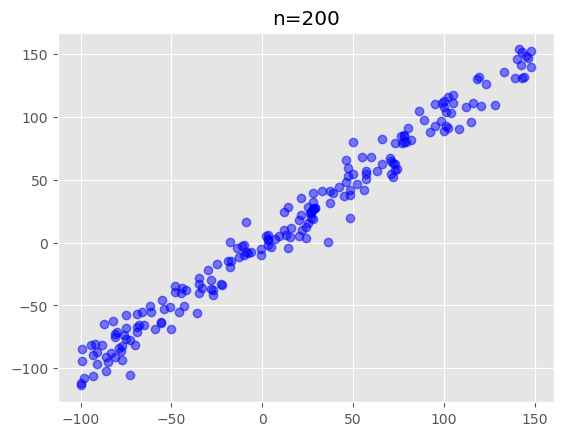

In [2]:
#| echo: false
import torch
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
plt.style.use('ggplot')

n=200

#n=200인 표본 추출
torch.manual_seed(2202)
W = torch.tensor([0,1]).reshape(2,-1).float()
_x = torch.randint(-100,150,(n,1))
_ones = torch.ones((n,1))
_epsilon = torch.randn((n,1)) * 10 #변동을 조금 더 주기 위해서 오차를 곱해줌
X = torch.concat((_ones,_x),axis=1).float()
y = X @ W + _epsilon

plt.plot(X[:,1],y,"bo",alpha=0.5)
plt.title("n=200")

우리가 가진 데이터를 관찰해봅시다. 가장크게 눈에 띄는 사실은 x와 y사이의 관계가 선형적이라는 점입니다. 따라서 간단한 선형모형으로 독립변수와 종속변수사이의 관계를 모델링할 수 있을 것 같습니다. 조금 더 세부적으로 들어가서 각각의 x값에 대해서 y값을 관찰해 봅시다. <span style = "color : blue">첫번째로 알 수 있는 점은 동일한 x값에 대해서도 서로다른 y값을 가지는 점들 데이터가 많이 있다</span>는 것입니다. 이로부터 $y$가 $x$뿐만아니라 또다른 확률변수 $\epsilon$의 값에 의해 결정된다는 것을 알 수 있습니다. <span style = "color : blue">두번째로 x값에 의해서 찍히는 점의 위치(y)의 양상이 다르다는 점을 알 수 있습니다.</span> x가 작으면 일반적으로 y는 낮은위치에서 점이 찍히고 x가 크면클수록 일반적으로 높은 위치에서 점이 찍히는 것을 알 수 있습니다.

데이터를 관찰하면서 얻은 사실로부터 $x$와 $y$사이의 관계를 수학적으로 모델링 해보겠습니다. 첫번째 사실로부터 우리는 동일한 $x$라도 각각의 데이터에 대해서 어떤 또다른 값이 더해짐을 알 수 있습니다. 이렇게 뽑힐때마다 그 값이 다른 변수는 확률변수 $\epsilon_i$를 더해줌으로서 표현할 수 있습니다. 여기서 오차가 따르는 분포에 대해서 가정을 합니다. 오차는 평균이 0이고 분산이 $\sigma^2$인 정규분포를 따르는 확률변수라고 가정합니다.

또한 두번째 사실로부터 우리는 $x$와 $y$는 커지면 커지고 작아지면 작아지는 관계임을 알 수 있습니다. 이러한 관계를 표현할 수 있는 방법은 여러가지가 있지만 선형회귀에서는 선형으로 이 관계를 표현합니다.

\begin{aligned}
&Y_i = w_0 + w_1x_1 + \dots + w_Mx_M + \epsilon_i={\bf{x_i}^\intercal}w + \epsilon_i\\
&\text{where , }{\bf{{\bf{x_i}^\intercal}}} = \begin {bmatrix}0,x_{i,1},\dots,x_{i,M} \end {bmatrix} \in \mathbb{R^{1 \times (M+1)},{\bf{w}} = \begin {bmatrix} w_0,w_1,\dots,w_M\end{bmatrix}}^\intercal \in \mathbb{R^{(M+1)\times 1}}\\
\quad\quad\quad &\epsilon_i \overset{i.i.d}{\sim} \mathcal{N}(0,\sigma^2)\,\,(\text{for } i=1,2,\dots,N)
\end{aligned}

이렇게 ${\bf{x_i}^\intercal}$와 $Y_i$사이의 관계를 정할 경우 각각의 $Y_i$안에 확률변수 $\epsilon_i$가 $Y_i$도 마찬가지로 정규분로를 따르는 확률변수로 그 값이 $\epsilon$에 의해 독립변수의 값이 동일하더라도 추출할때마다 다를 수 있습니다. $Y_i$도 확률변수이므로 정규분포를 따르는 확률변수이므로 중심위치와 변동을 확인하기 위해 기댓값과 분산을 구해볼 수 있습니다. 이때 $x$는 주어져 있으므로 그때의 확률분포에 대해서 계산하면 다음과 같습니다.

\begin{aligned}
&\mathbb{E}[Y_i] = \mathbb{E}[w_0 + \dots + w_Mx_M+\epsilon_i] = w_0 + w_1x_1 + \dots + w_Mx_M={\bf{x_i}^\intercal}w \\
&\text{var}[Y_i] = \text{var}[w_0 + \dots + w_Mx_M+\epsilon_i] = \text{var}[\epsilon_i] = \sigma^2
\end{aligned}

위수식으로부터 각각의 $Y_i$에 대한 확률분포는 정규분포이며($\epsilon_i$에 의해) 기댓값은 $x$와 $w$에 의해 정해지지만 분산은 $\sigma^2$으로 항상 동일하다는 점을 알 수 있습니다. 모두 정규분포를 따르지만 기댓값만 $x$에 의하여 달라집니다. 즉 다음과 같습니다.

\begin{aligned}
&Y_i|w;{\bf{x_i}^\intercal} \sim \mathcal{N}({\bf{x_i}^\intercal}{\bf{w}},\sigma^2)\, \text{ for } i = 1,2,\dots,N\\
&p(y_i|{\bf{w}};{\bf{x_i}^\intercal}) = 정규분포식
\end{aligned}

[이미지](./img1.PNG)

여기까지 우리가 가진 데이터를 기반으로 독립변수와 종속변사이의 관계를 선형모형을 만들어봤습니다. 그렇다면 **궁극적인 목적인 unseen data에 적절하게 종속변수의 값을 예측하려면** 어떻게 해야할까요?</span>만약 학습데이터로부터 적절히 가중치인 $w$를 구할수만 있다면 **독립변수가 입력되었때 대하여 종속변수가 따르는 확률분포(정규분포)**를 알 수 있고 **그 분포에서 가장 확률이 높은 곳의 종속변수의 값(정규분포에서는 xw)을 예측값**으로 하면 됩니다. 또 다르게 생각하면 가중치를 구한다는 것은 **데이터를 가장 잘 표현하는 직선**(평면,초평면)을 얻은것이므로 **입력x에 대하여 직선의 값을 읽어서 예측값**으로 하면 됩니다. 어찌됐건 두 경우 모두 가중치를 구해야**하므로 우리의 목적은 이제 가중치를 구하는 것입니다.

## <span style = "color:black"> <span style = "color : black">**Point Estimation - MLE**

그렇다면 가장 적절한 가중치는 무엇일까요? 데이터가 주어질때 가중치에 확률이 다음과 같다고 해봅시다. 

\begin{aligned}
&p({\bf{w}}|D) = p_{{\bf{w}}|Y_1,Y_2,\dots,Y_N}(w|y_1,y_2,\dots,y_N;{\bf{X}})\\
&\text{where, } {\bf{X}} = 
\begin{bmatrix} 
--{\bf{x_1^\intercal}}--\\
--{\bf{x_2^\intercal}}--\\
\vdots\\
--{\bf{x_N^\intercal}}--
\end{bmatrix}
\end{aligned}

오른쪽식은 왼쪽식에서의 데이터$D$를 좀더 풀어적은 수식입니다. 만약 위와 같은 확률을 계산했을때 그 값이 작은 가중치는 가능성이 낮은 가중치이므로 우리가 찾는 적절한 가중치는 아닐것입니다. 반대로 확률이 높은 가중치는 가능성이 높은 가중치이기때문에 우리가 찾는 가중치라고 할 수 있겠습니다. 그러면 그냥 "저 확률을 가장 크게 하는 가중치를 찾으면 되겠다"라고 생각이 들지만 안타까운 점은 우리는 위와같은 (조건부)확률(분포)을 바로 알기가 어렵습니다.. 따라서 베이즈정리의 도움을 받습니다. 베이즈 정리는 다음과 같습니다.

\begin{aligned}
&p({\bf{w}}|D) = \frac{p(D|{\bf{w}})p({\bf{w}})}{p(D)} \propto (D|{\bf{w}})p({\bf{w}}) = p_{Y_1,Y_2,\dots,Y_N|{\bf{w}}}(y_1,y_2,\dots,y_N|w;X)\\
\end{aligned}

수식에서 분모$p(D)$는 normalization constant라 하는 상수입니다. 그러므로 분자를 최대화하는 가중치를 구하면 되고 **MLE(maximum likelyhood estimation)** 에서는 **likelyhood인 $L = p(D|w)$만을 최대화 하는 것을 목적**으로 합니다. <br>

# <span style = "color:black"> **Gradient Descent**
경사하강법은 $\bf{w}$를 구하는 방법입니다. 경사하강법의 대략적인 흐름을 요약하면 다음과 같습니다.<br>

![nn](gradient%20descent.png)<br>
그림출처 : https://www.kdnuggets.com/2020/05/5-concepts-gradient-descent-cost-function.html

(경사하강법의 대략적인 흐름)<br>
1. $\bf{W}$의 추정값 $\hat{\bf{W}}$을 임의적으로 가정(초기화)한다.<br>
2. 가정한 $\hat{\bf{W}}$로 $\hat{\bf{y}}$($\bf{y}$에 대한 추정값)을 구하여 실제값$\bf{y}$와 **얼마나 비슷하지 않은지,틀린지 확인**한다. => Loss function의 역할입니다.<br>
3. **기울기(편미분계수,gradient)를 사용**하여 $\hat{\bf{W}}$을 수정한다.많이 틀리면 많이수정하고 적게틀리면 적게 수정한다.<br>
4. 2번,3번을 계속해서 반복한 후 어느정도 적게 틀리면 종료한다..<br><br>

## <span style = "color:black"> **선형회귀의 Loss function**
2번에서 구한 추정값 $\hat{\bf{W}}$이  **얼마나 틀린지,부정확한지** 알려주는 함수를 Loss function 또는 Cost function이라고 합니다. 선형회귀에서의 Loss function은 일반적으로 MSE를 사용하며 주어진 샘플에서 잔차(residual,$\hat{y}_i-y$)들을 전부 제곱하여 더한 값입니다.<br>

(Loss function)<br>
$MSE = \Sigma_{i=1}^{i=n}(y_i - \hat{y_i})^{2} = \frac{1}{n}({\bf{y} - \bf{\hat{y}}})^{T}({\bf{y} - \bf{\hat{y}}}) = \frac{1}{n}(\bf{y}-X\hat{\bf{W}})^{T}(\bf{y}-X\hat{\bf{W}})$<br>

MSE와 같은 Loss function은 우리의 추정이 **얼마나 틀렸는지**를 나타내는 $\hat{\bf{W}}$에 대한 함수입니다. 그러므로, loss function을 가장 최소화 하는 $\bf{\hat{W}}$을 찾아내면 확률변수사이의 선형관계인 $\bf{W}$를 알아낼 수 있습니다.

Text(110, 15, 'residual')

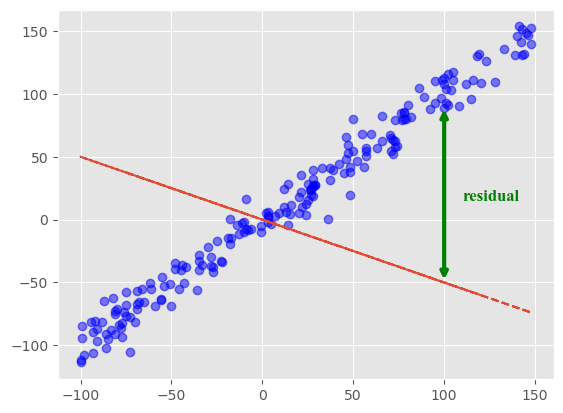

In [3]:
#| echo: false

W_hat = torch.tensor([0,-0.5]).reshape(2,-1).float()

plt.plot(X[:,1],y,"bo",alpha=0.5)
plt.plot(X[:,1],X@W_hat,"--")
plt.annotate('',(100,-50),(100,90),xycoords='data',arrowprops=dict(arrowstyle='<->',color='green',lw=3))
font2 = {'family': 'Times New Roman',
      'color':  'green',
      'weight': 'bold',
      'size': 12,
      'alpha': 1}
plt.text(110,15, 'residual', fontdict=font2)

## <span style = "color:black"> **Parameter update**
n개의 독립변수를 가지는 다변수 스칼라 함수에 대한 Gradient는 수학적으로 다음과 같습니다.<br>

$\nabla_{X}{f(x_1,x_2,...,x_n)} = (\frac{\partial f}{\partial x_1},\frac{\partial f}{\partial x_2},\dots,\frac{\partial f}{\partial x_n})$<br>
다변수 스칼라 함수에 그레디언트를 취하면 벡터입니다.그러므로,그레디언트를 벡터(다변수)를 입력했을 때,벡터를 출력으로 하는 벡터함수라고 생각해도 무방합니다.중요한 사실은 **임의의 공간상의 임의의 point $X$에서 스칼라함수에 대한 gradient of f = $-\nabla_{X}{f}$ 방향은 스칼라함수가 가장 급격하게 감소하는 방향**이라는 사실입니다.(증명생략)<br>

위의 사실에 의하면,우리는 임의의 $\hat{\bf{W}}$에서 Loss function이 가장 급격하게 감소하는 방향을 찾을 수 있습니다. 그러므로 감소하는 방향을 찾고 이동하고 감소하는 방향을 찾고 이동하고 반복하다보면... 궁극적인 목적인 틀린정도를 최소화하는 즉,Loss function값이 가장 작은 $\hat{\bf{W}}$를 찾을 수 있습니다. $\bf\hat{W}$를 수정하는 구체적인 수식은 다음과 같습니다.<br>

(Gradient descent parameter update)<br>
$\hat{\bf{W}}_{t} = \hat{\bf{W}}_{t-1} - \alpha\times\nabla_{W}{L}$<br>

$\hat{\bf{W}}_{t-1}$은 수정되기전의 가중치(벡터)이며 $\hat{\bf{W}_{t}}$는 파라미터를 한번 업데이트 한 후의 가중치(벡터)입니다. $t-1$의 $\hat{\bf{W_{t-1}}}$에 $-\alpha\times\nabla_{W}{L}$를 더해줌으로서 $\hat{\bf{W}}_{t-1}$은 loss function이 가장 급격히(많이)감소하는 방향으로 이동하며 $\hat{\bf{W}}_{t}$가 됩니다. $\alpha$는 학습률(learning rate)입니다. $\hat{\bf{W}}_{t-1}$과 곱해져서 얼마나 많이 또는 적게 움직일지를 결정합니다. 한번에 얼마나 이동할지에 비유한 "보폭"으로 생각할 수 있습니다.<br>

요약하자면, 경사하강법을 통하여 위와 같이 가중치$\hat{\bf{W}}$를 재귀적으로 업데이트 하면 loss function $L$이 가장 최소가 되는 지점의 $\hat{\bf{W}}$를 찾을 수 있습니다.<br><br>

## <span style = "color:black"> **MSE에 대한 더 상세한 전개**
MSE를 더 상세히 전개하면 다음과 같습니다.<br>
$MSE = \Sigma_{i=1}^{i=n}(y_i - \hat{y_i})^{2}$<br>
$= \frac{1}{n}({\bf{y} - \bf{\hat{y}}})^{T}({\bf{y} - \bf{\hat{y}}})$<br>
$= \frac{1}{n}(\bf{y}-X\hat{\bf{W}})^{T}(\bf{y}-X\hat{\bf{W}})$<br>
$= \frac{1}{n}(\bf{y^T - \hat{\bf{W}}^{T}\bf{X}^{T})(\bf{y} - \bf{X}\bf{\hat{W}}})$<br>
$= \frac{1}{n}(\bf{y^Ty-y^TX\hat{W}} - \hat{W}X^Ty + \hat{W}^TX^TX\hat{W})$<br>

여기서 $\bf{y^TX\hat{W}} \in \bf{R}^{1 \times 1}$ 이므로 $\bf{y^TX\hat{W}} = (\bf{y^TX\hat{W}})^T = (\bf{\hat{W}X^Ty})$가 성립합니다.
그러므로 MSE를 정리하면 다음과 같습니다.<br>
(MSE)<br>
$MSE = \frac{1}{n}(\bf{y^Ty -2\hat{W}X^Ty + \hat{W}^TX^TX\hat{W}})$<br>

## <span style = "color:black"> **Gradient Descent에 대한 더 상세한 전개($Loss$ = MSE일 경우)**

(Gradient of MSE)<br>
$\nabla{L} = MSE$<br>
$= \bf{\frac{1}{n}\frac{\partial}{\partial \hat{W}}(\bf{y^Ty - 2\hat{W}^TX^T + \hat{W}^TX^TX\hat{W}})}$<br>
$= \bf{\frac{1}{n}}(\bf{\frac{\partial}{\partial \hat{W}}}{y^{T}y} - \frac{\partial}{\partial \hat{W}}2\hat{W}^{T}X^{T}y + \frac{\partial}{\partial\hat{W}}\hat{W}^{T}X^{T}X\hat{W})$<br>
$= \bf{\frac{1}{n}(\frac{\partial}{\partial \hat{W}}{y^{T}y} - \frac{\partial}{\partial \hat{W}}2y^TX\hat{W} + \frac{\partial}{\partial\hat{W}}\hat{W}^TX^TX\hat{W})}$<br>
$= \bf{\frac{1}{n}[0 - 2X^Ty + (X^TX + X^TX)\hat{W}]}$<br>
$= \bf{\frac{2}{n}X^T(X\hat{W} - y)}$

(parameter update)<br>
$\bf{\hat{W}_{t} = \hat{W}_{t-1} - \alpha \times \frac{2}{n}X^T(X\hat{W} - y)}$

# 구현

In [4]:
import torch
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
plt.style.use('ggplot')

모집단의 두 확률변수사이의 관계가 다음과 같다고 가정해봅시다.<br>
$y =  2.5 + 3x + \epsilon$<br>

모집단에서 크기가 n인 표본을 뽑으면 다음과 같습니다.

Text(0.5, 1.0, 'n=200')

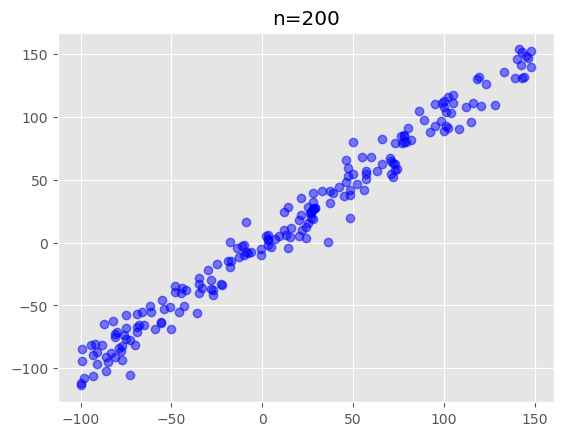

In [5]:
#n=200인 표본 추출
n=200
torch.manual_seed(2202)
W = torch.tensor([0,1]).reshape(2,-1).float()
_x = torch.randint(-100,150,(n,1))
_ones = torch.ones((n,1))
_epsilon = torch.randn((n,1)) * 10 #변동을 조금 더 주기 위해서 오차를 곱해줌
X = torch.concat((_ones,_x),axis=1).float()
y = X @ W + _epsilon

plt.plot(X[:,1],y,"bo",alpha=0.5)
plt.title("n=200")


경사하강법으로 표본에 가장 잘 맞는 직선을 찾아봅시다.<br>
먼저 임의의 $\bf{\hat{w}} = (w_0,w_1)=(0,-5)$로 가정합니다.

Text(0.5, 1.0, 'initializing What')

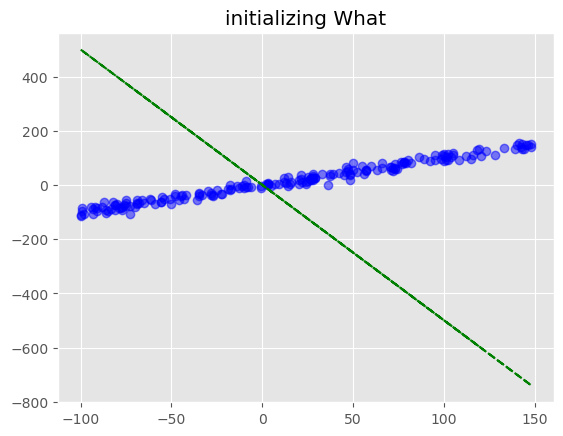

In [6]:
#1. 먼저 임의의 W_hat을 가정한다.
W_hat = torch.tensor([0,-5]).reshape(2,-1).float()

#시각화코드
plt.plot(X[:,1],y,"bo",alpha=0.5)
plt.plot(X[:,1],X@W_hat,"g--")
plt.title("initializing What")

tensor(27.4176)
업데이트 전 W_hat : tensor([[ 0.],
        [-5.]])
파라미터 한 번 업데이트 후 W_hat : tensor([[-2.7418],
        [-7.7418]])


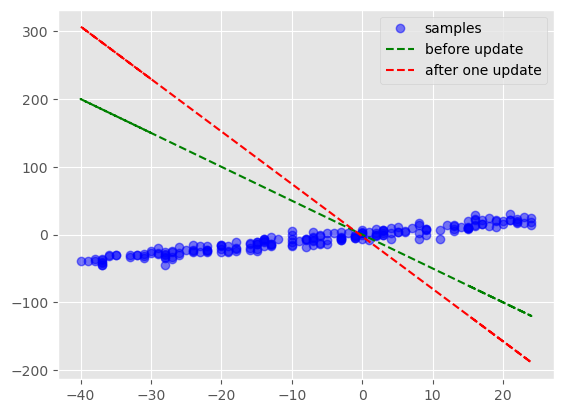

In [7]:
#n=100인 표본 추출
n=200

torch.manual_seed(2202)
W = torch.tensor([0,1]).reshape(2,-1).float()
_x = torch.randint(-40,25,(n,1))
_ones = torch.ones((n,1))
_epsilon = torch.randn((n,1))*5 #변동을 조금 더 주기 위해서 오차를 곱해줌
X = torch.concat((_ones,_x),axis=1).float()
y = X @ W + _epsilon

#plt.plot(X[:,1],y,"go",alpha=0.5)

#1. 먼저 임의의 W_hat을 가정한다.
W_hat = torch.tensor([0,-5]).reshape(2,-1).float()

#2.loss 를 계산한다.
#2.1
#pytorch의 MSELoss 클래스로 loss_fn이라는 객체(object)를 만듭니다.
#이 객체는 호출(call)하여 MSE를 계산할 수 있습니다
loss_fn = torch.nn.MSELoss()
yhat = X @ W
#2.2
#call하여 MSE를 계산
loss = loss_fn(yhat,y)
print(loss)

#3.파라미터를 업데이트 한다
print("업데이트 전 W_hat :",W_hat)
plt.plot(X[:,1],y,"bo",alpha=0.5)
plt.plot(X[:,1],X@W_hat,"g--")
W_hat.data = W_hat.data - 1e-1 * loss.data
print("파라미터 한 번 업데이트 후 W_hat :",W_hat)
plt.plot(X[:,1],X@W_hat,"r--")
plt.legend(["samples","before update","after one update"])

경사하강법의 흐름을 따라서 파이토치에서 구현하기위해 4가지 과정이 필요합니다.<br>
1)$\bf{\hat{y}}$<br>
2)loss<br>
3)derivative<br>
4)update & clean<br>
위와 같이 파라미터를 업데이트 한 방식을 여러번 반복하면 알맞은 직선을 얻을 수 있습니다.여기서는 위의 절차를 다 수행하지 않고 최종적으로 정리해놓은 MSE에 대한 미분을 활용하여 구현해보겠습니다.

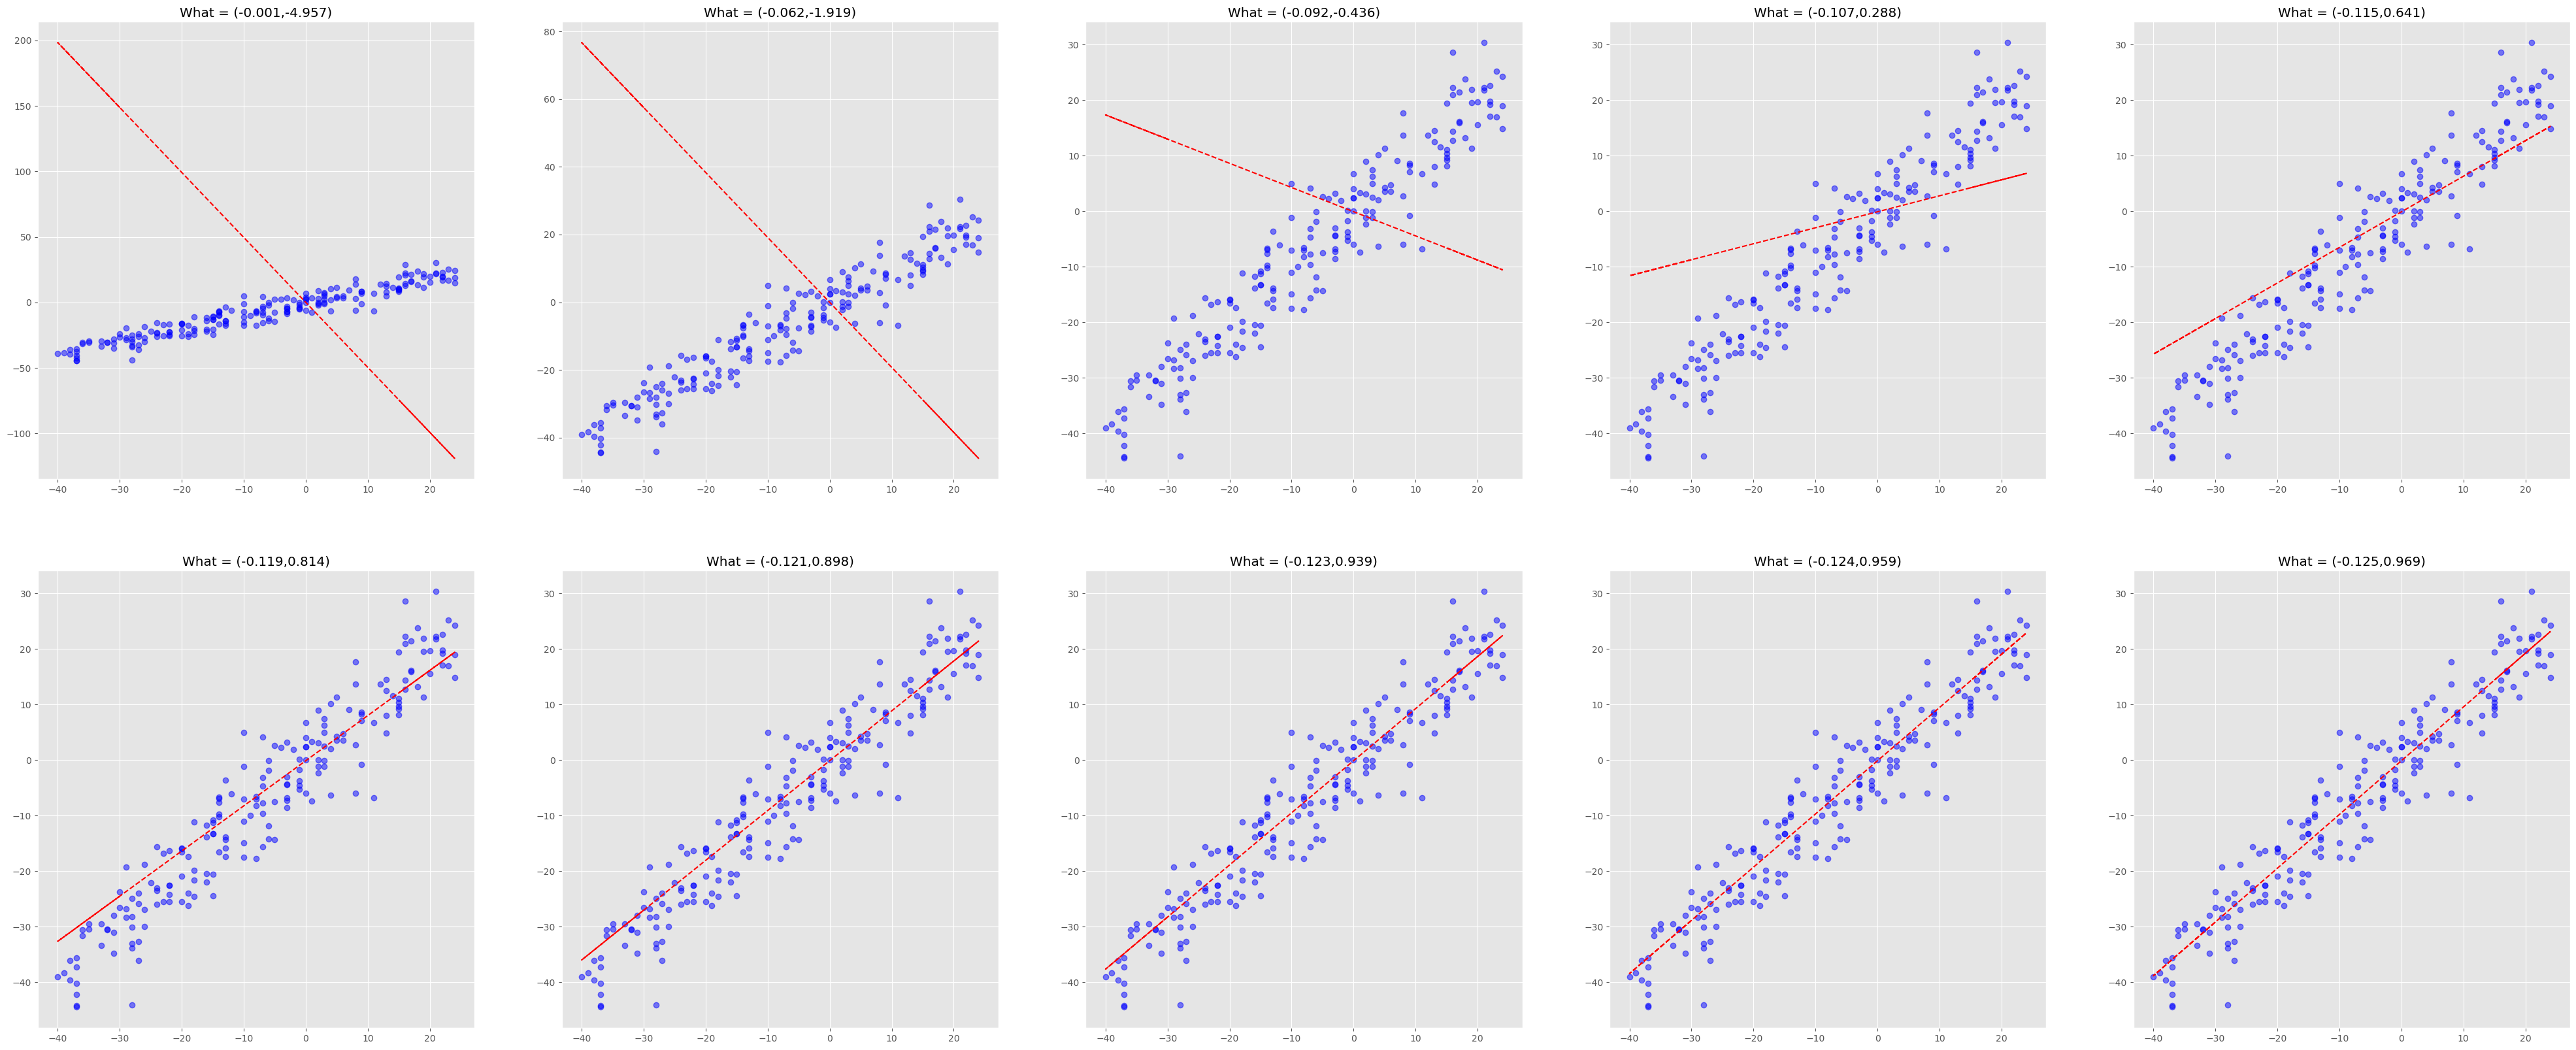

In [8]:
torch.manual_seed(2202)
W = torch.tensor([0,1]).reshape(2,-1).float()
_x = torch.randint(-40,25,(n,1))
_ones = torch.ones((n,1))
_epsilon = torch.randn((n,1))*5 #변동을 조금 더 주기 위해서 오차를 곱해줌
X = torch.concat((_ones,_x),axis=1).float()
y = X @ W + _epsilon

#plt.plot(X[:,1],y,"go",alpha=0.5)

#1. 먼저 임의의 W_hat을 가정한다.
W_hat = torch.tensor([0,-5]).reshape(2,-1).float()

#상세히 전개한 parameter update수식 사용.
#2~4반복
plt.subplots(1,5,figsize=(50,20))
i=1

for epoch in range(1000):
    #1~3 yhat,loss,derivative(gradient) skip
    #4 update
    W_hat.data = W_hat.data - (1e-5 * 2/n * X.T@(X@W_hat - y)).data #직선의 변화를 관찰하기위한 작은 학습률

    #시각화코드
    
    if epoch % 100 == 0:
        plt.subplot(2,5,i)
        plt.plot(X[:,1],y,"bo",alpha=0.5)
        plt.plot(X[:,1],X@W_hat,"r--")
        t = W_hat.data
        text=f"What = ({round(t[0].tolist()[0],3)},{round(t[1].tolist()[0],3)})"
        plt.title(text)
        i+=1


## <span style = "color:black"> 결과해석
200개의 샘플로부터 $\bf{w}$를 추정하여 $\hat{\bf{w}}= (0.125,0.969)$를 얻었습니다. population regression model의 ${\bf{w}} = (w_0,w_1) = (0,1)$을 올바르게 추정했음을 알 수 있습니다. 아주 약간의 차이가 존재하는데 이 차이는 모집단에서 샘플을 더 얻거나 더 세밀하게 업데이트하면 최소화할 수 있습니다.

Text(0.5, 1.0, 'What = (-0.125,0.969)')

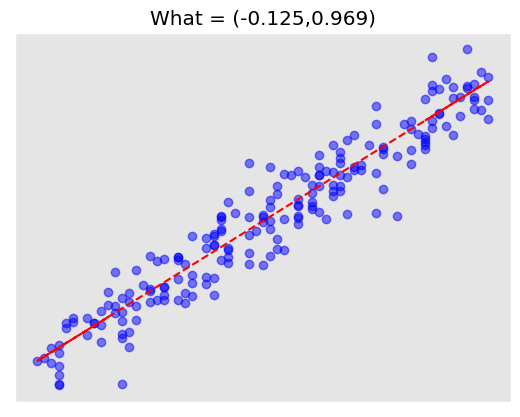

In [9]:
#plt.title("w_1 : {} // w_0: {}".format(round(W_hat[1].tolist()[0],3),round(W_hat[0].tolist()[0],3)))
plt.title("Linear Regression")
text=f"What = ({round(t[0].tolist()[0],3)},{round(t[1].tolist()[0],3)})"
plt.plot(X[:,1],y,"bo",alpha=0.5)
plt.plot(X[:,1],X@W_hat,"r--")
plt.gca().axes.xaxis.set_visible(False)
plt.gca().axes.yaxis.set_visible(False)
plt.title(text)

## <span style = "color:black"> **Appendix**

## <span style = "color:black"> **MLE의 해와 MSE유도**

가장오른쪽식에 대해서 계산하면 다음과 같습니다.

\begin{aligned}
L = p_{Y_1,Y_2,\dots,Y_N|{\bf{w}}}(y_1,y_2,\dots,y_N|w;X) &= p_{Y_1,{\bf{w}}}(y_1|{w},{\bf{X}}) \times p_{Y_2,{\bf{w}}}(y_2|{w},{\bf{X}}) \dots \times p_{Y_N,{\bf{w}}}(y_N|{w},{\bf{X}}) \\
&= \prod_{n = 1}^{N}p_{Y_n|{\bf{W}}}(y_n|w;{\bf{X}}) = \prod_{n = 1}^{N}\mathcal{N}(y_n|{\bf{x_n}^\intercal}{\bf{w}},\sigma^2) \\
&= \prod_{i=1}^N \frac{1}{\sqrt{2\pi\sigma^2}}\exp\left\{-\frac{(y_n-{\bf{x_n}}^\intercal{\bf{w}})^2}{2\sigma^2} \right\}  \\
\end{aligned}

log likelyhood를 구하면 다음과 같습니다.

\begin{aligned}
\text{lnL} &= \text{ln}\prod_{n=1}^N \frac{1}{\sqrt{2\pi\sigma^2}}\exp\left\{-\frac{(y_n-{\bf{x_n}}^\intercal{\bf{w}})^2}{2\sigma^2} \right\}  \\
&= \sum_{n=1}^N\text{ln} \frac{1}{\sqrt{2\pi \sigma^2}}\text{exp}\left\{-\frac{(y_n-{\bf{x_n}}^\intercal{\bf{w}})^2}{2\sigma^2} \right\} \\
&= \sum_{n=1}^N \text{ln}\frac{1}{\sqrt{2\pi\sigma^2}} - \frac{1}{2\sigma^2} \sum_{n=1}^{N}(y_n-{\bf{x_n}}^\intercal{\bf{w}})^2 \\
&= C_1 - C_2\sum_{n=1}^{N}(y_n-{\bf{x_n}}^\intercal{\bf{w}})^2 
\end{aligned}

상수를 제외해도 최댓값의 위치는 변하지 않으므로 제외하고 loglikelyhood를 최대화 하는 가중치가 우리가 목표입니다. 이는 우리가 모르는 가중치에 대한 추정량이므로 $\bf{\hat{w}}$로 표기합니다.

여기서 시그마에서부터 보면 흔히 경사하강법에서 쓰는 MSE가 보입니다. MSE는 선형회귀의 MLE에서 Negative log likelyhood를 구할때 나오는 항입니다.

\begin {aligned}
\hat{\bf{w}} &= \underset{\bf{w}}{\text{argmax}}\sum_{n=1}^{N}(y_n-{\bf{x_n}}^\intercal{\bf{w}})^2 \\
&=\underset{\bf{w}}{\text{argmax}}||({\bf{y}}-{\bf{XW}})||^2 \\
&=\underset{\bf{w}}{\text{argmax}}(\bf{y-{XW}})^T(\bf{y-XW})
\end{aligned}

psuedo inverse에 의한 해를 구하면 다음과 같습니다.

\begin{aligned}
\hat{{\bf{w}}} = (\bf{X^TX}^{-1})X^Ty
\end{aligned}

## <span style = "color:black"> <span style = "color : black">**참고자료**

[Maximum Likelihood Estimation(MLE) & Maximum A Posterior(MAP)](https://hyeongminlee.github.io/post/bnn002_mle_map/)